## Dataset columns

<code>show_id</code> : Movie id

<code>type</code> : Type (Commedies, Movies and Tv Shows)

<code>title</code> : Title 

<code>director</code> : Director

<code>cast</code> : Cast

<code>country</code> :C ountry where it was filmed, NaN means that it was't filmed in a specific place, for instance animations

<code>date_added</code> : Date added in the Netflix platform

<code>release_year</code> : Year released in the platform

<code>duration</code> : Duration in minutes, For kinds with seasons or erpisodes the duration means the number of seasons or episodes

<code>description</code> : movie brief description  

<code>genre</code>: Genre such as Action, Children, Classic Movies 

## 1. Loading data into a dictionary
<p><img src="https://www.nit.pt/wp-content/uploads/2021/04/33189164abfbc79f0250b72a62a3b865-754x394.jpg" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization according to Schwarz, 2020, boasting over 200 million subscribers as of January 2021 (CBS, 2021).</p>
<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. In the dataset used is a CSV file containing movies and series  data of Netflix, it got information from 1940 to 2020. 
</p> It has been a previous analyze, so in this dataset there is the information of the average duration of movies throughout the years. </p>
<p>As evidence of this, the information provided was the following information: For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>
<p>If we're going to be working with this data, we know a good place to start would be to probably start working with <code>pandas</code>. But first we'll need to create a DataFrame from scratch. Let's start by creating a dictionary!</p>

In [2]:
# Creating the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Creating a dictionary with the two lists
movie_dict = {'years': years, 'durations': durations}

# Printing the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Creating a DataFrame from a dictionary
<p>To convert our dictionary <code>movie_dict</code> to a <code>pandas</code> DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.</p>

In [3]:
# Import pandas under its usual alias
import pandas as pd

# Creating a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Printing the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## 3. A visual inspection of our data
<p>Alright, we now have a <code>pandas</code> DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to check if the movie lengths have been indeed decreasing over time. A great place to start will be a visualization of the data.</p>
<p>Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but <code>matploblib.pyplot</code> is one of the most common packages to do so.</p>

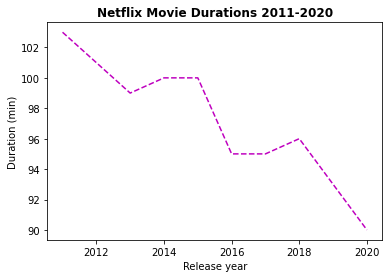

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years ,durations, color='m', linestyle='dashed')

# Create a title
plt.title('Netflix Movie Durations 2011-2020', fontweight='bold')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
# Show the plot
plt.show()

## 4. Loading the rest of the data from a CSV
<p>Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with the pervious analyze, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>
<p>We now are going to use the CSV file, available at the path <code>"datasets/netflix_data.csv"</code>. Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.</p>

In [5]:
# Reading in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Printing the first five rows of the DataFrame
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## 5. Filtering for movies!
<p>Okay, we have our data! Now we can dive in and start looking at movie lengths. </p>
<p>Or can we? Looking at the first five rows of our new DataFrame, we notice a column <code>type</code>. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the <code>duration</code> column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?</p>
<p>Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where <code>type</code> is <code>Movie</code>. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>
<p>Let's put our data subsetting skills to work!</p>

In [6]:
# Subseting the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Selecting only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Printing the first five rows of the new DataFrame
netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 6. Creating a scatter plot
<p>Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.</p>
<p>This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>

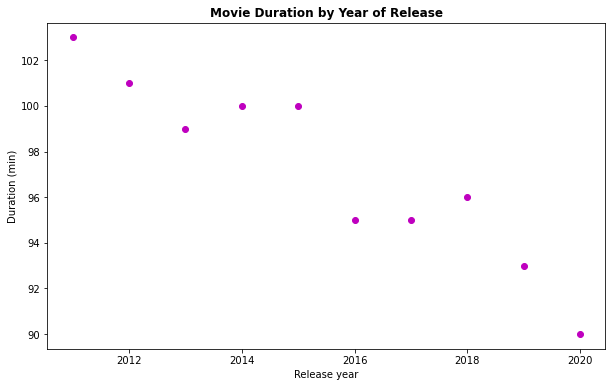

In [7]:
# Creating a figure and increasing the figure size
fig = plt.figure(figsize=(10,6))

# Creating a scatter plot of duration versus year
plt.scatter(years,durations, color='m')

# Creating a title
plt.title('Movie Duration by Year of Release', fontweight="bold")
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
# Showing the plot
plt.show()

## 7. Digging deeper
<p>This is already much more informative than the simple plot, that we created before. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.</p>
<p>Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [8]:
# Filtering for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration < 60]

# Printing the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


## 8. Marking non-feature films
<p>Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.</p>
<p>In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!</p>

In [10]:
colors = []

# Iteration over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("r")
    elif row['genre'] == "Documentaries":
        colors.append("b")
    elif row['genre'] == "Stand-Up":
        colors.append("m")
    else:
        colors.append("k")
        
'''This is a tricky one! Beccause as we want to use the .iterrows() method to iterate through the 
DataFrame's labels and rows, then we are using the row values to determine what color to add.
    It is just a fun way to show this =)'''

# Inspect the first 10 values in your list        
colors[0:10]

['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'b']

## 9. Plotting with color!
<p>Lovely looping! We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>
<p>This time, we'll also spruce up our plot with some additional axis labels and a new theme with <code>plt.style.use()</code>. The latter isn't taught in Intermediate Python, but can be a fun way to add some visual flair to a basic <code>matplotlib</code> plot. You can find more information on customizing the style of your plot <a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html">here</a>!</p>

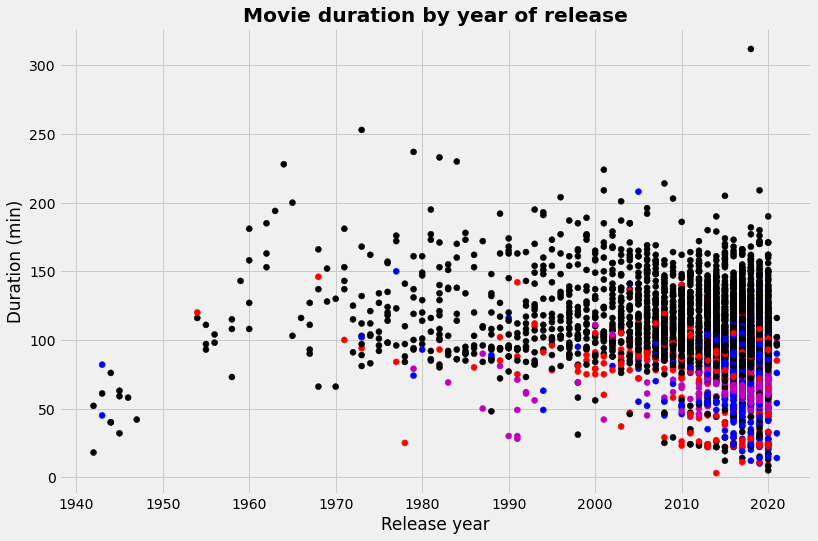

In [11]:
# Setting the figure style and initalizing a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Creating a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration, c=colors)

# Creating a title and axis labels
plt.title('Movie duration by year of release', fontweight='bold')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Showing the plot
plt.show()

## 10. What next?
<p>Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses. </p>

In [12]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = 'maybe =)'

### References:

CBS. Netflix tops 200 million subscribers but faces growing challenge from Disney Plus. CBS News, 2021. Available in: <https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/>. Acessed: 25 August 2022.


SWARTZ, J. Netflix shares close up 8% for yet another record high. MarketWatch, 2020. Available in: <https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10>. Acessed: 25 August 2022.

